In [73]:
import pandas as pd
import numpy as np
import glom
from helpers.transform import matches_to_elo
from helpers.predict import predict, get_latest_elos
from helpers.plot import plot_team, plot_many, plot_all

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
matches = pd.read_csv("./matches/matches.csv")
matches.head()


,Wk,Day,Date,Time,Home,Score,Away,Attendance,Venue,Referee,datetime,season,elo_home_pre,elo_away_pre,elo_home_post,elo_away_post,xG,xG.1
0,1,Sat,2014-08-16,12:45,Manchester Utd,1–2,Swansea City,75339.0,Old Trafford,Mike Dean,2014-08-16 12:45:00,2014-2015,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sat,2014-08-16,15:00,Stoke City,0–1,Aston Villa,27478.0,Bet365 Stadium,Anthony Taylor,2014-08-16 15:00:00,2014-2015,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Sat,2014-08-16,15:00,Leicester City,2–2,Everton,31603.0,King Power Stadium,Mike Dean,2014-08-16 15:00:00,2014-2015,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Sat,2014-08-16,15:00,QPR,0–1,Hull City,17603.0,Loftus Road Stadium,Craig Pawson,2014-08-16 15:00:00,2014-2015,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Sat,2014-08-16,15:00,West Ham,0–1,Tottenham,34977.0,Boleyn Ground,Chris Foy,2014-08-16 15:00:00,2014-2015,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
elo = matches_to_elo(matches)
elo.to_csv("./elo.csv")

In [47]:
elo["team"].unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Burnley', 'Cardiff City', 'Chelsea', 'Crystal Palace', 'Everton',
       'Fulham', 'Huddersfield', 'Hull City', 'Leeds United',
       'Leicester City', 'Liverpool', 'Luton Town', 'Manchester City',
       'Manchester Utd', 'Middlesbrough', 'Newcastle Utd', 'Norwich City',
       "Nott'ham Forest", 'QPR', 'Sheffield Utd', 'Southampton',
       'Stoke City', 'Sunderland', 'Swansea City', 'Tottenham', 'Watford',
       'West Brom', 'West Ham', 'Wolves'], dtype=object)

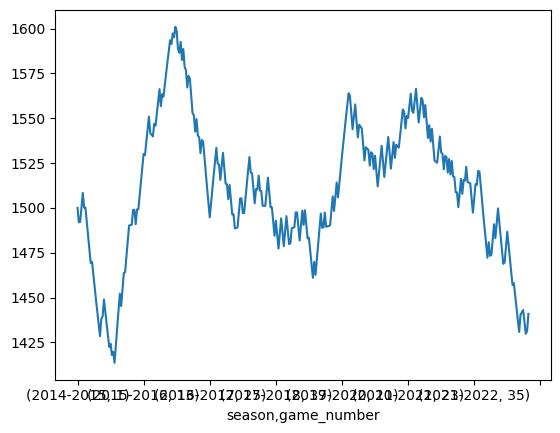

In [66]:
team = "Leicester City"
plot_team(elo, team)

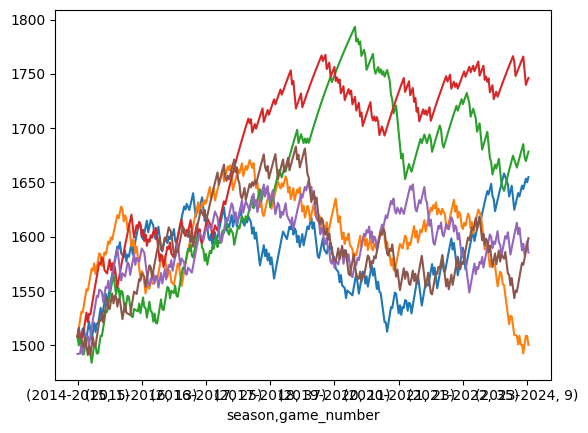

In [83]:
plot_many(elo, teams=["Liverpool", "Manchester City", "Arsenal", "Manchester Utd", "Tottenham", "Chelsea"])
# plot_all(elo)

In [75]:
get_latest_elos(elo).sort_values(ascending=False)

team
Manchester City    1746.259352
Liverpool          1678.402302
Arsenal            1654.912511
Tottenham          1598.575438
Manchester Utd     1585.366658
Newcastle Utd      1572.046341
Aston Villa        1555.057811
Brighton           1530.180120
Brentford          1522.582724
Chelsea            1500.293119
Fulham             1484.267256
Crystal Palace     1468.267311
West Ham           1466.126578
Luton Town         1457.300870
Wolves             1456.034994
Nott'ham Forest    1450.775752
Burnley            1449.660826
Leicester City     1440.942032
Sheffield Utd      1434.723683
Hull City          1431.399544
Cardiff City       1427.205921
Everton            1424.648480
Stoke City         1421.668602
Bournemouth        1421.328686
Swansea City       1413.494110
QPR                1412.529322
Middlesbrough      1410.992095
West Brom          1410.846159
Leeds United       1401.406575
Norwich City       1384.837289
Watford            1378.746464
Sunderland         1370.935898
Sou

(0.5805393093041518, 0.4194606906958481)

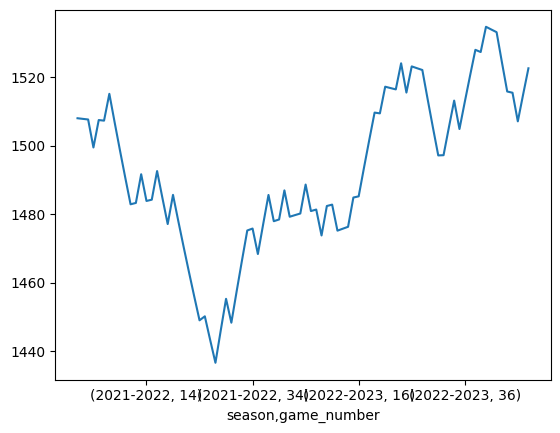

In [84]:
plot_team(elo, "Brentford")
predict(elo, "Brentford", "West Ham")